In [51]:
# import numpy as np
# import pandas as pd
# import json
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.utils import to_categorical
# import cv2
# from PIL import Image
# import warnings
# warnings.filterwarnings('ignore')


In [52]:

# # Set random seeds for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)


In [53]:
# class BCSTransferLearning:
#     def __init__(self, model_path, json_path, images_folder, target_size=(224, 224)):
#         self.model_path = model_path
#         self.json_path = json_path
#         self.images_folder = images_folder
#         self.target_size = target_size
#         self.model = None
#         self.label_encoder = LabelEncoder()
        
#     def load_existing_model(self):
#         """โหลดโมเดลที่มีอยู่แล้ว"""
#         try:
#             self.model = load_model(self.model_path)
#             print(f"โหลดโมเดลสำเร็จจาก: {self.model_path}")
#             print(f"โครงสร้างโมเดล:")
#             self.model.summary()
#             return True
#         except Exception as e:
#             print(f"ไม่สามารถโหลดโมเดลได้: {e}")
#             return False
    
#     def load_and_preprocess_data(self):
#         """โหลดและเตรียมข้อมูลจาก JSON และรูปภาพ"""
#         # โหลดข้อมูลจาก JSON
#         with open(self.json_path, 'r', encoding='utf-8') as f:
#             data = json.load(f)
        
#         df = pd.DataFrame(data)
#         print(f"จำนวนข้อมูลทั้งหมด: {len(df)}")
        
#         # กรองข้อมูลที่มี BCS ระบุ
#         df_filtered = df[df['ค่า BCS (โปรดระบุเป็นตัวเลข)'] != 'ไม่ระบุ (ไม่ทราบ)'].copy()
#         print(f"จำนวนข้อมูลที่มี BCS ระบุ: {len(df_filtered)}")
        
#         if len(df_filtered) == 0:
#             raise ValueError("ไม่พบข้อมูลที่มี BCS ระบุ")
        
#         # แปลงค่า BCS เป็น numeric
#         try:
#             df_filtered['BCS'] = pd.to_numeric(df_filtered['ค่า BCS (โปรดระบุเป็นตัวเลข)'])
#         except:
#             # หากมีข้อมูลที่ไม่ใช่ตัวเลข ให้แปลงเป็น categorical
#             df_filtered['BCS'] = df_filtered['ค่า BCS (โปรดระบุเป็นตัวเลข)']
        
#         print("การกระจายของข้อมูล BCS:")
#         print(df_filtered['BCS'].value_counts().sort_index())
        
#         return df_filtered
    
#     def load_images_for_sample(self, row):
#         """โหลดรูปภาพทั้ง 4 มุมมองสำหรับตัวอย่างหนึ่ง"""
#         views = {
#             'top': row['ภาพด้านบน (Top View)'],
#             'back': row['ภาพด้านหลัง (Back View)'],
#             'right': row['ภาพด้านขวา (Right View)'],
#             'left': row['ภาพด้านซ้าย (Left View)']
#         }
        
#         view_folders = {
#             'top': 'Top View',
#             'back': 'Back View',
#             'right': 'Right View',
#             'left': 'Left View'
#         }
        
#         images = []
        
#         for view, filename in views.items():
#             if pd.isna(filename) or filename == '':
#                 continue
                
#             img_path = os.path.join(self.images_folder, view_folders[view], filename)
            
#             if os.path.exists(img_path):
#                 try:
#                     # โหลดและปรับขนาดรูปภาพ
#                     img = load_img(img_path, target_size=self.target_size)
#                     img_array = img_to_array(img)
#                     img_array = img_array / 255.0  # Normalize
#                     images.append(img_array)
#                 except Exception as e:
#                     print(f"ไม่สามารถโหลดรูปภาพ {img_path}: {e}")
#                     continue
        
#         return np.array(images) if images else None
    
#     def prepare_dataset(self, df):
#         """เตรียมข้อมูล dataset สำหรับการ training"""
#         X_all = []
#         y_all = []
        
#         print("กำลังโหลดรูปภาพ...")
#         for idx, row in df.iterrows():
#             images = self.load_images_for_sample(row)
#             if images is not None and len(images) > 0:
#                 # ใช้ภาพแรกที่โหลดได้ (สามารถปรับเปลี่ยนให้ใช้หลายภาพได้)
#                 X_all.append(images[0])  
#                 y_all.append(row['BCS'])
        
#         if not X_all:
#             raise ValueError("ไม่สามารถโหลดรูปภาพได้เลย")
        
#         X = np.array(X_all)
#         y = np.array(y_all)
        
#         print(f"ขนาด X: {X.shape}")
#         print(f"ขนาด y: {y.shape}")
        
#         # Encode labels
#         y_encoded = self.label_encoder.fit_transform(y)
#         y_categorical = to_categorical(y_encoded)
        
#         print(f"จำนวนคลาส: {len(self.label_encoder.classes_)}")
#         print(f"คลาส: {self.label_encoder.classes_}")
        
#         return X, y_categorical, y_encoded
    
#     def modify_model_for_transfer_learning(self, num_classes):
#         """ปรับโมเดลสำหรับ transfer learning"""
#         # Freeze base layers (optional - ขึ้นอยู่กับความต้องการ)
#         for layer in self.model.layers[:-3]:  # Freeze all except last 3 layers
#             layer.trainable = False
        
#         # แสดงสถานะการ freeze
#         trainable_count = sum([1 for layer in self.model.layers if layer.trainable])
#         total_count = len(self.model.layers)
#         print(f"จำนวน layers ที่ trainable: {trainable_count}/{total_count}")
        
#         # ปรับ learning rate ให้เล็กลงสำหรับ transfer learning
#         self.model.compile(
#             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#             loss='categorical_crossentropy',
#             metrics=['accuracy']
#         )
        
#         print("ปรับโมเดลสำหรับ transfer learning เสร็จสิ้น")
    
#     def train_model(self, X, y, validation_split=0.2, batch_size=4, max_epochs=100):
#         """เทรนโมเดลด้วย early stopping"""
#         # Split data
#         X_train, X_val, y_train, y_val = train_test_split(
#             X, y, test_size=validation_split, random_state=42, stratify=y
#         )
        
#         print(f"Training set: {X_train.shape[0]} ตัวอย่าง")
#         print(f"Validation set: {X_val.shape[0]} ตัวอย่าง")
        
#         # Callbacks
#         early_stopping = EarlyStopping(
#             monitor='val_loss',
#             patience=5,
#             restore_best_weights=True,
#             verbose=1
#         )
        
#         model_checkpoint = ModelCheckpoint(
#             'best_bcs_model_transfer.h5',
#             monitor='val_loss',
#             save_best_only=True,
#             verbose=1
#         )
        
#         # Train model
#         history = self.model.fit(
#             X_train, y_train,
#             validation_data=(X_val, y_val),
#             batch_size=batch_size,
#             epochs=max_epochs,
#             callbacks=[early_stopping, model_checkpoint],
#             verbose=1
#         )
        
#         return history, X_val, y_val
    
#     def plot_training_history(self, history):
#         """แสดงกราฟการเทรน"""
#         fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
#         # Loss
#         axes[0].plot(history.history['loss'], label='Training Loss')
#         axes[0].plot(history.history['val_loss'], label='Validation Loss')
#         axes[0].set_title('Model Loss')
#         axes[0].set_xlabel('Epoch')
#         axes[0].set_ylabel('Loss')
#         axes[0].legend()
#         axes[0].grid(True)
        
#         # Accuracy
#         axes[1].plot(history.history['accuracy'], label='Training Accuracy')
#         axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
#         axes[1].set_title('Model Accuracy')
#         axes[1].set_xlabel('Epoch')
#         axes[1].set_ylabel('Accuracy')
#         axes[1].legend()
#         axes[1].grid(True)
        
#         plt.tight_layout()
#         plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
#         plt.show()
    
#     def evaluate_model(self, X_val, y_val):
#         """ประเมินโมเดลและสร้าง confusion matrix"""
#         # Predict
#         y_pred = self.model.predict(X_val)
#         y_pred_classes = np.argmax(y_pred, axis=1)
#         y_true_classes = np.argmax(y_val, axis=1)
        
#         # Calculate accuracy
#         accuracy = accuracy_score(y_true_classes, y_pred_classes)
#         print(f"Validation Accuracy: {accuracy:.4f}")
        
#         # Get unique classes present in validation set
#         unique_classes = np.unique(np.concatenate([y_true_classes, y_pred_classes]))
#         class_names = [str(self.label_encoder.classes_[i]) for i in unique_classes]
        
#         # Confusion Matrix with only classes present in validation
#         cm = confusion_matrix(y_true_classes, y_pred_classes, labels=unique_classes)
        
#         plt.figure(figsize=(10, 8))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                    xticklabels=class_names,
#                    yticklabels=class_names)
#         plt.title('Confusion Matrix')
#         plt.xlabel('Predicted BCS')
#         plt.ylabel('True BCS')
#         plt.tight_layout()
#         plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
#         plt.show()
        
#         # Classification Report with correct labels
#         print("\nClassification Report:")
#         print(classification_report(y_true_classes, y_pred_classes,
#                                   labels=unique_classes,
#                                   target_names=class_names))
        
#         # แสดงข้อมูลเพิ่มเติม
#         print(f"\nจำนวนคลาสทั้งหมดใน dataset: {len(self.label_encoder.classes_)}")
#         print(f"คลาสทั้งหมด: {self.label_encoder.classes_}")
#         print(f"จำนวนคลาสใน validation set: {len(unique_classes)}")
#         print(f"คลาสใน validation set: {[self.label_encoder.classes_[i] for i in unique_classes]}")
        
#         return accuracy, cm
    
#     def run_transfer_learning(self):
#         """รันกระบวนการ transfer learning ทั้งหมด"""
#         print("=== เริ่มกระบวนการ Transfer Learning สำหรับ BCS Prediction ===")
        
#         # 1. Load existing model
#         if not self.load_existing_model():
#             return None
        
#         # 2. Load and preprocess data
#         df = self.load_and_preprocess_data()
        
#         # 3. Prepare dataset
#         X, y, y_encoded = self.prepare_dataset(df)
        
#         # 4. Modify model for transfer learning
#         num_classes = len(self.label_encoder.classes_)
#         self.modify_model_for_transfer_learning(num_classes)
        
#         # 5. Train model
#         history, X_val, y_val = self.train_model(X, y)
        
#         # 6. Plot training history
#         self.plot_training_history(history)
        
#         # 7. Evaluate model
#         accuracy, cm = self.evaluate_model(X_val, y_val)
        
#         # 8. Save final model
#         self.model.save('bcs_model_transfer_final.h5')
#         print("บันทึกโมเดลสุดท้ายเป็น 'bcs_model_transfer_final.h5'")
        
#         print("=== Transfer Learning เสร็จสิ้น ===")
        
#         return {
#             'model': self.model,
#             'history': history,
#             'accuracy': accuracy,
#             'confusion_matrix': cm,
#             'label_encoder': self.label_encoder
#         }

In [54]:
# # วิธีการใช้งาน
# if __name__ == "__main__":
#     # กำหนด paths
#     model_path = "bcs_prediction_model.h5"
#     json_path = "bcs_dataset_with_filenames.json"
#     images_folder = "bcs_images"
    
#     # สร้าง instance และรัน transfer learning
#     transfer_learner = BCSTransferLearning(model_path, json_path, images_folder)
#     results = transfer_learner.run_transfer_learning()
    
#     if results:
#         print(f"Final Validation Accuracy: {results['accuracy']:.4f}")

=== เริ่มกระบวนการ Improved Transfer Learning สำหรับ BCS Prediction ===
โหลดโมเดลสำเร็จจาก: bcs_prediction_model.h5
จำนวน layers ทั้งหมด: 93
จำนวน parameters ทั้งหมด: 4,383,153
จำนวนข้อมูลทั้งหมด: 100
จำนวนข้อมูลที่มี BCS ระบุ: 99
การกระจายของข้อมูล BCS:
BCS
2.0     2
3.0    16
4.0    16
5.0    36
6.0    18
7.0     4
8.0     2
9.0     3
Name: count, dtype: int64
กำลังโหลดรูปภาพและสร้าง augmented data (x5)...
ตัวอย่างที่โหลดสำเร็จ: 97
ตัวอย่างที่โหลดไม่สำเร็จ: 2
ข้อมูลหลัง augmentation: 1455 ตัวอย่าง
เพิ่มขึ้นจากข้อมูลต้นฉบับ: 97 ตัวอย่าง

การกระจายของ BCS labels ก่อน encoding:
BCS 2.0: 35 ตัวอย่าง
BCS 3.0: 205 ตัวอย่าง
BCS 4.0: 240 ตัวอย่าง
BCS 5.0: 550 ตัวอย่าง
BCS 6.0: 290 ตัวอย่าง
BCS 7.0: 65 ตัวอย่าง
BCS 8.0: 15 ตัวอย่าง
BCS 9.0: 55 ตัวอย่าง

จำนวนคลาสที่จะเทรน: 8
คลาส BCS: [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
=== การปรับแต่งโมเดลสำหรับ Transfer Learning ===
จำนวนคลาสในโมเดลเดิม: 9
จำนวนคลาสในข้อมูลใหม่: 8
ปรับ output layer จาก 9 เป็น 8 คลาส
สร้าง output layer ใหม่เสร็จสิ้น
Lay

291/291 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.3308 - loss: 2.0096 - top_3_accuracy: 0.6767 - val_accuracy: 0.3780 - val_loss: 1.7860 - val_top_3_accuracy: 0.7182 - learning_rate: 2.0000e-04
Epoch 2/200
290/291 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3503 - loss: 1.7711 - top_3_accuracy: 0.6839
Epoch 2: val_accuracy did not improve from 0.37801
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.3505 - loss: 1.7707 - top_3_accuracy: 0.6841 - val_accuracy: 0.3780 - val_loss: 1.6870 - val_top_3_accuracy: 0.7423 - learning_rate: 2.0000e-04
Epoch 3/200
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3504 - loss: 1.7091 - top_3_accuracy: 0.7379
Epoch 3: val_accuracy did not improve from 0.37801
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.3505 - loss: 1.7090 - top_3_accuracy: 0.7379 - val_accuracy: 0.3780 - val_loss: 1.6698 - val_top_3_accuracy: 0.7423 - learning_rate: 2.0000e-04
Epoch 4/200
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3

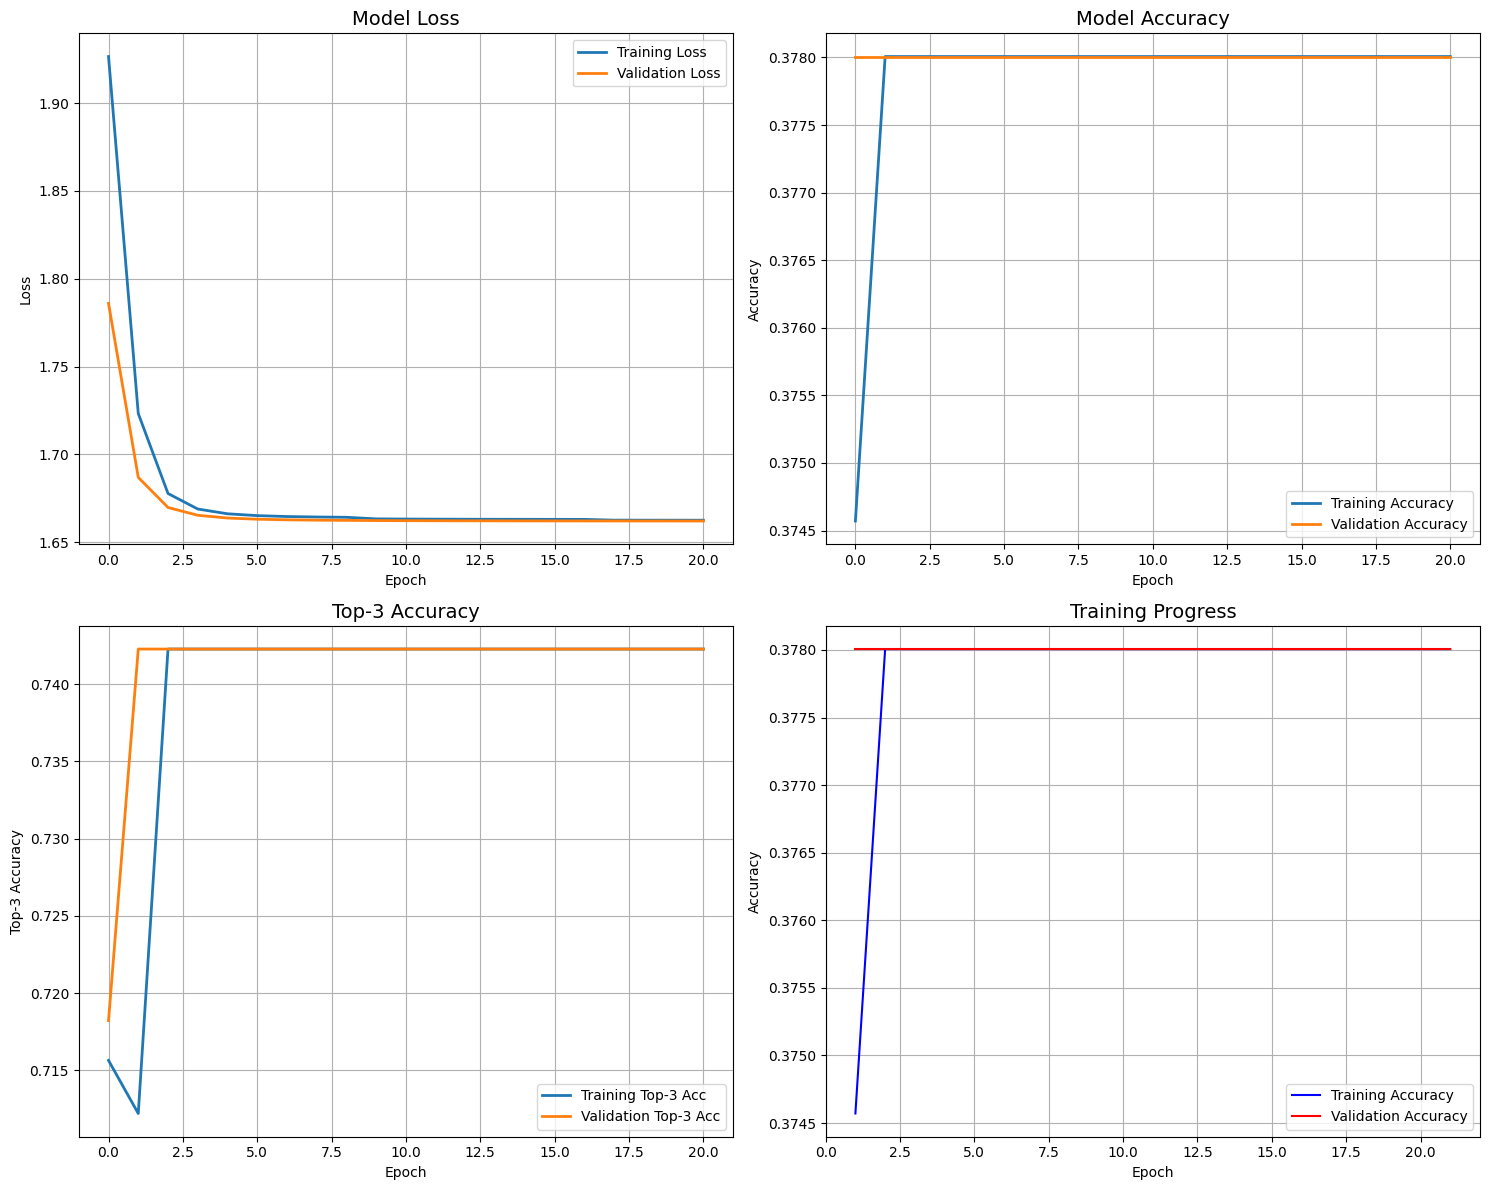

=== สถิติการเทรน ===
จำนวน epochs ที่เทรน: 21
Best training accuracy: 0.3780
Best validation accuracy: 0.3780
Final training loss: 1.6626
Final validation loss: 1.6621
Best training top-3 accuracy: 0.7423
Best validation top-3 accuracy: 0.7423
=== การประเมินโมเดล ===
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step
Validation Accuracy: 0.3780
Top-3 Accuracy: 0.7182


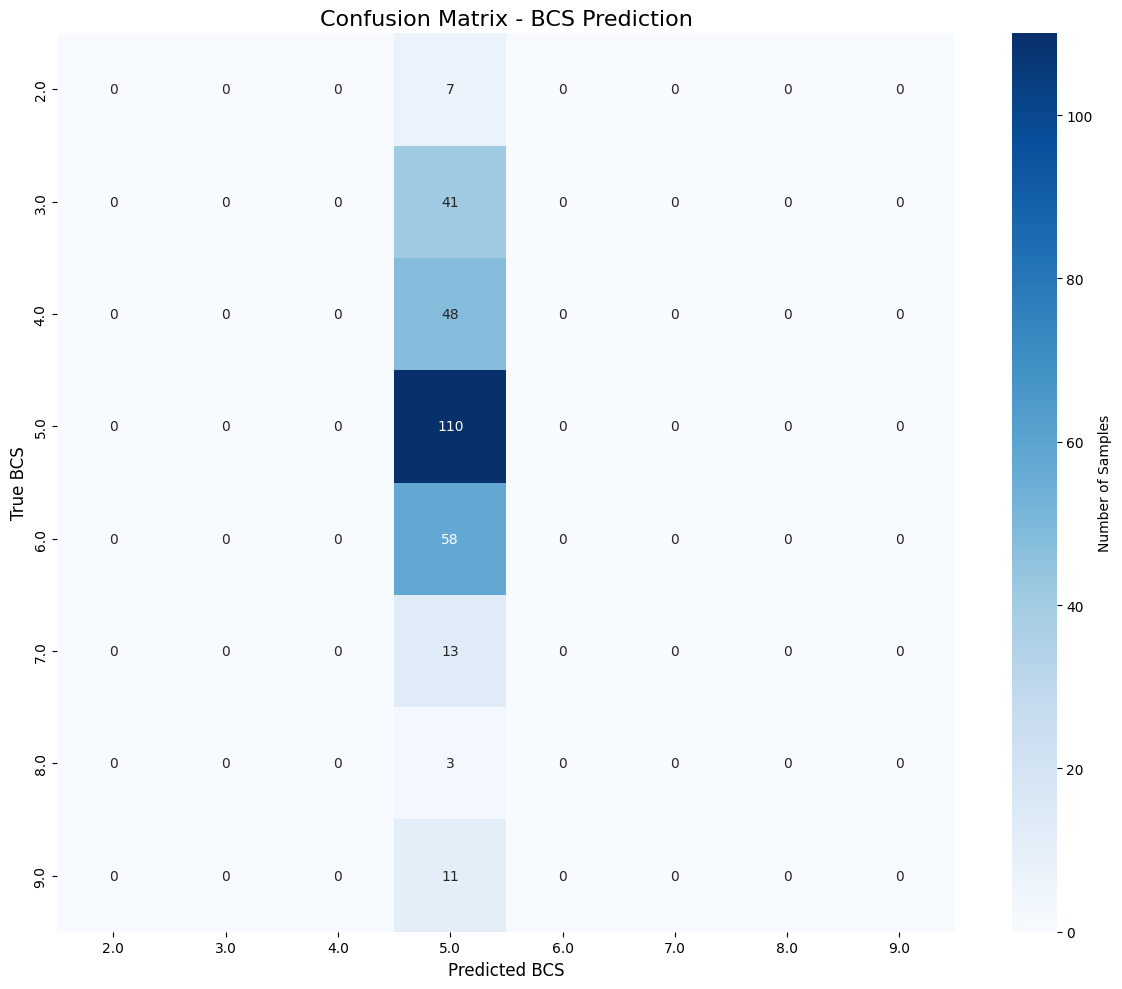


=== Classification Report ===
              precision    recall  f1-score   support

         2.0     0.0000    0.0000    0.0000         7
         3.0     0.0000    0.0000    0.0000        41
         4.0     0.0000    0.0000    0.0000        48
         5.0     0.3780    1.0000    0.5486       110
         6.0     0.0000    0.0000    0.0000        58
         7.0     0.0000    0.0000    0.0000        13
         8.0     0.0000    0.0000    0.0000         3
         9.0     0.0000    0.0000    0.0000        11

    accuracy                         0.3780       291
   macro avg     0.0473    0.1250    0.0686       291
weighted avg     0.1429    0.3780    0.2074       291


=== Per-Class Analysis ===
Class 2.0 accuracy: 0.0000 (7 samples)
Class 3.0 accuracy: 0.0000 (41 samples)
Class 4.0 accuracy: 0.0000 (48 samples)
Class 5.0 accuracy: 1.0000 (110 samples)
Class 6.0 accuracy: 0.0000 (58 samples)
Class 7.0 accuracy: 0.0000 (13 samples)
Class 8.0 accuracy: 0.0000 (3 samples)
Class 9.0 a

In [55]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class BCSImprovedTransferLearning:
    def __init__(self, model_path, json_path, images_folder, target_size=(224, 224)):
        self.model_path = model_path
        self.json_path = json_path
        self.images_folder = images_folder
        self.target_size = target_size
        self.model = None
        self.label_encoder = LabelEncoder()
        
        # Data Augmentation สำหรับเพิ่มข้อมูล
        self.datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            brightness_range=[0.9, 1.1],
            fill_mode='nearest'
        )
        
    def load_existing_model(self):
        """โหลดโมเดลที่มีอยู่แล้ว"""
        try:
            self.model = load_model(self.model_path)
            print(f"โหลดโมเดลสำเร็จจาก: {self.model_path}")
            print(f"จำนวน layers ทั้งหมด: {len(self.model.layers)}")
            
            # แสดงข้อมูลโมเดลแบบสั้น
            total_params = self.model.count_params()
            print(f"จำนวน parameters ทั้งหมด: {total_params:,}")
            
            return True
        except Exception as e:
            print(f"ไม่สามารถโหลดโมเดลได้: {e}")
            return False
    
    def load_and_preprocess_data(self):
        """โหลดและเตรียมข้อมูลจาก JSON และรูปภาพ"""
        with open(self.json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        df = pd.DataFrame(data)
        print(f"จำนวนข้อมูลทั้งหมด: {len(df)}")
        
        # กรองข้อมูลที่มี BCS ระบุ
        df_filtered = df[df['ค่า BCS (โปรดระบุเป็นตัวเลข)'] != 'ไม่ระบุ (ไม่ทราบ)'].copy()
        print(f"จำนวนข้อมูลที่มี BCS ระบุ: {len(df_filtered)}")
        
        if len(df_filtered) == 0:
            raise ValueError("ไม่พบข้อมูลที่มี BCS ระบุ")
        
        # แปลงค่า BCS
        try:
            df_filtered['BCS'] = pd.to_numeric(df_filtered['ค่า BCS (โปรดระบุเป็นตัวเลข)'])
        except:
            df_filtered['BCS'] = df_filtered['ค่า BCS (โปรดระบุเป็นตัวเลข)']
        
        print("การกระจายของข้อมูล BCS:")
        print(df_filtered['BCS'].value_counts().sort_index())
        
        return df_filtered
    
    def load_images_for_sample(self, row):
        """โหลดรูปภาพทั้ง 4 มุมมองสำหรับตัวอย่างหนึ่ง"""
        views = {
            'top': row['ภาพด้านบน (Top View)'],
            'back': row['ภาพด้านหลัง (Back View)'],
            'right': row['ภาพด้านขวา (Right View)'],
            'left': row['ภาพด้านซ้าย (Left View)']
        }
        
        view_folders = {
            'top': 'Top View',
            'back': 'Back View',
            'right': 'Right View',
            'left': 'Left View'
        }
        
        images = []
        
        for view, filename in views.items():
            if pd.isna(filename) or filename == '':
                continue
                
            img_path = os.path.join(self.images_folder, view_folders[view], filename)
            
            if os.path.exists(img_path):
                try:
                    img = load_img(img_path, target_size=self.target_size)
                    img_array = img_to_array(img)
                    img_array = img_array / 255.0  # Normalize
                    images.append(img_array)
                except Exception as e:
                    print(f"ไม่สามารถโหลดรูปภาพ {img_path}: {e}")
                    continue
        
        return np.array(images) if images else None
    
    def prepare_dataset_with_augmentation(self, df, augment_factor=3):
        """เตรียมข้อมูลพร้อม data augmentation เพื่อเพิ่มจำนวนข้อมูล (ใช้เฉพาะข้อมูลที่มีค่า BCS)"""
        X_all = []
        y_all = []
        
        print(f"กำลังโหลดรูปภาพและสร้าง augmented data (x{augment_factor+1})...")
        
        successfully_loaded = 0
        failed_samples = 0
        
        for idx, row in df.iterrows():
            # ตรวจสอบอีกครั้งว่าแถวนี้มี BCS ที่ถูกต้อง
            if pd.isna(row['BCS']) or row['BCS'] == '' or str(row['BCS']).strip() == '':
                failed_samples += 1
                continue
                
            images = self.load_images_for_sample(row)
            if images is not None and len(images) > 0:
                successfully_loaded += 1
                # ใช้ทุกมุมมองที่มี
                for img in images:
                    # เพิ่มภาพต้นฉบับ
                    X_all.append(img)
                    y_all.append(row['BCS'])
                    
                    # สร้าง augmented images
                    for _ in range(augment_factor):
                        img_batch = img.reshape(1, *img.shape)
                        augmented = self.datagen.flow(img_batch, batch_size=1).__next__()[0]
                        X_all.append(augmented)
                        y_all.append(row['BCS'])
            else:
                failed_samples += 1
        
        print(f"ตัวอย่างที่โหลดสำเร็จ: {successfully_loaded}")
        print(f"ตัวอย่างที่โหลดไม่สำเร็จ: {failed_samples}")
        
        if not X_all:
            raise ValueError("ไม่สามารถโหลดรูปภาพได้เลย กรุณาตรวจสอบ path และไฟล์รูปภาพ")
        
        X = np.array(X_all)
        y = np.array(y_all)
        
        print(f"ข้อมูลหลัง augmentation: {X.shape[0]} ตัวอย่าง")
        print(f"เพิ่มขึ้นจากข้อมูลต้นฉบับ: {successfully_loaded} ตัวอย่าง")
        
        # ตรวจสอบการกระจายของ labels ก่อน encoding
        print("\nการกระจายของ BCS labels ก่อน encoding:")
        unique, counts = np.unique(y, return_counts=True)
        for label, count in zip(unique, counts):
            print(f"BCS {label}: {count} ตัวอย่าง")
        
        # Shuffle data
        indices = np.random.permutation(len(X))
        X = X[indices]
        y = y[indices]
        
        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        y_categorical = to_categorical(y_encoded)
        
        print(f"\nจำนวนคลาสที่จะเทรน: {len(self.label_encoder.classes_)}")
        print(f"คลาส BCS: {sorted(self.label_encoder.classes_)}")
        
        return X, y_categorical, y_encoded
    
    def modify_model_for_transfer_learning(self, num_classes):
        """ปรับโมเดลสำหรับ transfer learning - ปรับแต่งให้เหมาะสม"""
        print("=== การปรับแต่งโมเดลสำหรับ Transfer Learning ===")
        
        # ตรวจสอบจำนวนคลาสของโมเดลเดิม
        original_output_shape = self.model.output.shape[-1]
        print(f"จำนวนคลาสในโมเดลเดิม: {original_output_shape}")
        print(f"จำนวนคลาสในข้อมูลใหม่: {num_classes}")
        
        # ถ้าจำนวนคลาสไม่ตรงกัน ต้องปรับ output layer
        if original_output_shape != num_classes:
            print(f"ปรับ output layer จาก {original_output_shape} เป็น {num_classes} คลาส")
            
            # สร้างโมเดลใหม่โดยตัด output layer เดิมออก
            base_model = tf.keras.Model(inputs=self.model.input, outputs=self.model.layers[-2].output)
            
            # เพิ่ม output layer ใหม่ที่มีจำนวนคลาสถูกต้อง
            predictions = tf.keras.layers.Dense(num_classes, activation='softmax', name='new_predictions')(base_model.output)
            
            # สร้างโมเดลใหม่
            self.model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
            print("สร้าง output layer ใหม่เสร็จสิ้น")
        
        # กำหนดจำนวน layers ที่จะ unfreeze (ปรับได้ตามข้อมูล)
        total_layers = len(self.model.layers)
        
        # สำหรับข้อมูลน้อย ให้ freeze มากกว่าปกติ แต่ไม่มากเกินไป
        layers_to_unfreeze = min(8, max(3, total_layers // 3))  # unfreeze 1/3 หรืออย่างน้อย 3 layers
        
        # Freeze layers (ไม่ freeze output layer ใหม่)
        for i, layer in enumerate(self.model.layers):
            if i < (total_layers - layers_to_unfreeze):
                layer.trainable = False
            else:
                layer.trainable = True
        
        # ตรวจสอบให้แน่ใจว่า output layer สามารถ train ได้
        if hasattr(self.model.layers[-1], 'trainable'):
            self.model.layers[-1].trainable = True
        
        # แสดงสถานะ
        trainable_count = sum([1 for layer in self.model.layers if layer.trainable])
        trainable_params = sum([layer.count_params() for layer in self.model.layers if layer.trainable])
        total_params = self.model.count_params()
        
        print(f"Layers: {trainable_count}/{total_layers} trainable")
        print(f"Parameters: {trainable_params:,}/{total_params:,} trainable ({trainable_params/total_params*100:.1f}%)")
        
        # Compile with appropriate learning rate - Fixed metric names
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
            loss='categorical_crossentropy',
            metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy')]
        )
        
        print("ปรับแต่งโมเดลเสร็จสิ้น")
    
    def train_model_improved(self, X, y, validation_split=0.2, batch_size=4, max_epochs=200):
        """เทรนโมเดลด้วยการปรับแต่งที่ดีขึ้น"""
        print("=== เริ่มการเทรนโมเดล ===")
        
        # Split data
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=validation_split, random_state=42, 
            stratify=np.argmax(y, axis=1)  # stratify based on class
        )
        
        print(f"Training set: {X_train.shape[0]} ตัวอย่าง")
        print(f"Validation set: {X_val.shape[0]} ตัวอย่าง")
        print(f"Batch size: {batch_size}")
        print(f"Steps per epoch: {len(X_train) // batch_size}")
        
        # Enhanced Callbacks
        early_stopping = EarlyStopping(
            monitor='val_accuracy',
            patience=20,  # เพิ่ม patience เพื่อให้เทรนนานขึ้น
            restore_best_weights=True,
            verbose=1,
            mode='max',
            min_delta=0.001  # ความแตกต่างขั้นต่ำที่ถือว่าดีขึ้น
        )
        
        reduce_lr = ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.5,
            patience=8,
            min_lr=1e-7,
            verbose=1,
            mode='max'
        )
        
        model_checkpoint = ModelCheckpoint(
            'best_bcs_model_improved.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1,
            mode='max'
        )
        
        # Custom callback เพื่อแสดงความคืบหน้า
        class TrainingProgressCallback(tf.keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs=None):
                if (epoch + 1) % 10 == 0:
                    print(f"Epoch {epoch+1}: loss={logs['loss']:.4f}, accuracy={logs['accuracy']:.4f}, "
                          f"val_loss={logs['val_loss']:.4f}, val_accuracy={logs['val_accuracy']:.4f}")
        
        callbacks = [early_stopping, reduce_lr, model_checkpoint, TrainingProgressCallback()]
        
        # Train model
        print(f"เริ่มเทรนด้วย {max_epochs} epochs สูงสุด...")
        history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=max_epochs,
            callbacks=callbacks,
            verbose=1,
            shuffle=True
        )
        
        print(f"เทรนเสร็จสิ้น หลังจาก {len(history.history['loss'])} epochs")
        
        return history, X_val, y_val
    
    def plot_training_history(self, history):
        """แสดงกราฟการเทรนแบบละเอียด"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Loss
        axes[0,0].plot(history.history['loss'], label='Training Loss', linewidth=2)
        axes[0,0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
        axes[0,0].set_title('Model Loss', fontsize=14)
        axes[0,0].set_xlabel('Epoch')
        axes[0,0].set_ylabel('Loss')
        axes[0,0].legend()
        axes[0,0].grid(True)
        
        # Accuracy
        axes[0,1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
        axes[0,1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
        axes[0,1].set_title('Model Accuracy', fontsize=14)
        axes[0,1].set_xlabel('Epoch')
        axes[0,1].set_ylabel('Accuracy')
        axes[0,1].legend()
        axes[0,1].grid(True)
        
        # Top-3 Accuracy
        if 'top_3_accuracy' in history.history:
            axes[1,0].plot(history.history['top_3_accuracy'], label='Training Top-3 Acc', linewidth=2)
            axes[1,0].plot(history.history['val_top_3_accuracy'], label='Validation Top-3 Acc', linewidth=2)
            axes[1,0].set_title('Top-3 Accuracy', fontsize=14)
            axes[1,0].set_xlabel('Epoch')
            axes[1,0].set_ylabel('Top-3 Accuracy')
            axes[1,0].legend()
            axes[1,0].grid(True)
        else:
            # If top-3 accuracy is not available, show additional loss smoothing
            window_size = min(10, len(history.history['loss']))
            smooth_loss = pd.Series(history.history['loss']).rolling(window=window_size).mean()
            smooth_val_loss = pd.Series(history.history['val_loss']).rolling(window=window_size).mean()
            
            axes[1,0].plot(smooth_loss, label='Smoothed Training Loss', linewidth=2)
            axes[1,0].plot(smooth_val_loss, label='Smoothed Validation Loss', linewidth=2)
            axes[1,0].set_title('Smoothed Loss', fontsize=14)
            axes[1,0].set_xlabel('Epoch')
            axes[1,0].set_ylabel('Loss')
            axes[1,0].legend()
            axes[1,0].grid(True)
        
        # Learning Rate
        if 'lr' in history.history:
            axes[1,1].plot(history.history['lr'], linewidth=2, color='red')
            axes[1,1].set_title('Learning Rate', fontsize=14)
            axes[1,1].set_xlabel('Epoch')
            axes[1,1].set_ylabel('Learning Rate')
            axes[1,1].set_yscale('log')
            axes[1,1].grid(True)
        else:
            # Show training progress over epochs
            epochs = range(1, len(history.history['accuracy']) + 1)
            axes[1,1].plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
            axes[1,1].plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
            axes[1,1].set_title('Training Progress', fontsize=14)
            axes[1,1].set_xlabel('Epoch')
            axes[1,1].set_ylabel('Accuracy')
            axes[1,1].legend()
            axes[1,1].grid(True)
        
        plt.tight_layout()
        plt.savefig('improved_training_history.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # แสดงสถิติการเทรน
        print("=== สถิติการเทรน ===")
        print(f"จำนวน epochs ที่เทรน: {len(history.history['loss'])}")
        print(f"Best training accuracy: {max(history.history['accuracy']):.4f}")
        print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
        print(f"Final training loss: {history.history['loss'][-1]:.4f}")
        print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")
        
        if 'top_3_accuracy' in history.history:
            print(f"Best training top-3 accuracy: {max(history.history['top_3_accuracy']):.4f}")
            print(f"Best validation top-3 accuracy: {max(history.history['val_top_3_accuracy']):.4f}")
    
    def evaluate_model(self, X_val, y_val):
        """ประเมินโมเดลอย่างละเอียด"""
        print("=== การประเมินโมเดล ===")
        
        # Predict
        y_pred = self.model.predict(X_val, batch_size=4, verbose=1)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(y_val, axis=1)
        
        # Calculate metrics
        accuracy = accuracy_score(y_true_classes, y_pred_classes)
        print(f"Validation Accuracy: {accuracy:.4f}")
        
        # Top-3 accuracy - Fixed calculation
        top_3_correct = 0
        for i in range(len(y_true_classes)):
            true_class = y_true_classes[i]
            top_3_preds = np.argsort(y_pred[i])[-3:]  # Get top 3 predictions
            if true_class in top_3_preds:
                top_3_correct += 1
        
        top_3_acc = top_3_correct / len(y_true_classes)
        print(f"Top-3 Accuracy: {top_3_acc:.4f}")
        
        # Class-wise analysis
        unique_classes = np.unique(np.concatenate([y_true_classes, y_pred_classes]))
        class_names = [str(self.label_encoder.classes_[i]) for i in unique_classes]
        
        # Confusion Matrix
        cm = confusion_matrix(y_true_classes, y_pred_classes, labels=unique_classes)
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names,
                   yticklabels=class_names,
                   cbar_kws={'label': 'Number of Samples'})
        plt.title('Confusion Matrix - BCS Prediction', fontsize=16)
        plt.xlabel('Predicted BCS', fontsize=12)
        plt.ylabel('True BCS', fontsize=12)
        plt.tight_layout()
        plt.savefig('improved_confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Detailed Classification Report
        print("\n=== Classification Report ===")
        report = classification_report(y_true_classes, y_pred_classes,
                                     labels=unique_classes,
                                     target_names=class_names,
                                     digits=4)
        print(report)
        
        # Per-class accuracy analysis
        print("\n=== Per-Class Analysis ===")
        for i, class_name in enumerate(class_names):
            class_idx = unique_classes[i]
            class_mask = (y_true_classes == class_idx)
            if np.sum(class_mask) > 0:
                class_accuracy = np.sum((y_pred_classes == class_idx) & class_mask) / np.sum(class_mask)
                print(f"Class {class_name} accuracy: {class_accuracy:.4f} ({np.sum(class_mask)} samples)")
        
        return accuracy, cm, top_3_acc
    
    def predict_single_image(self, image_path):
        """ทำนายค่า BCS สำหรับรูปภาพเดี่ยว"""
        try:
            img = load_img(image_path, target_size=self.target_size)
            img_array = img_to_array(img)
            img_array = img_array / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            
            prediction = self.model.predict(img_array)
            predicted_class = np.argmax(prediction[0])
            predicted_bcs = self.label_encoder.classes_[predicted_class]
            confidence = prediction[0][predicted_class]
            
            # Get top 3 predictions
            top_3_indices = np.argsort(prediction[0])[-3:][::-1]
            top_3_predictions = []
            for idx in top_3_indices:
                bcs_value = self.label_encoder.classes_[idx]
                conf = prediction[0][idx]
                top_3_predictions.append((bcs_value, conf))
            
            return {
                'predicted_bcs': predicted_bcs,
                'confidence': confidence,
                'top_3_predictions': top_3_predictions
            }
        except Exception as e:
            print(f"Error predicting image {image_path}: {e}")
            return None
    
    def run_improved_transfer_learning(self):
        """รันกระบวนการ transfer learning ที่ปรับปรุงแล้ว"""
        print("=== เริ่มกระบวนการ Improved Transfer Learning สำหรับ BCS Prediction ===")
        
        # 1. Load existing model
        if not self.load_existing_model():
            return None
        
        # 2. Load and preprocess data
        df = self.load_and_preprocess_data()
        
        # 3. Prepare dataset with augmentation
        X, y, y_encoded = self.prepare_dataset_with_augmentation(df, augment_factor=4)
        
        # 4. Modify model
        num_classes = len(self.label_encoder.classes_)
        self.modify_model_for_transfer_learning(num_classes)
        
        # 5. Train model
        history, X_val, y_val = self.train_model_improved(X, y, batch_size=4)  # เพิ่ม batch size
        
        # 6. Plot training history
        self.plot_training_history(history)
        
        # 7. Evaluate model
        accuracy, cm, top_3_acc = self.evaluate_model(X_val, y_val)
        
        # 8. Save final model
        self.model.save('bcs_model_improved_final.h5')
        print("บันทึกโมเดลสุดท้ายเป็น 'bcs_model_improved_final.h5'")
        
        print("=== Improved Transfer Learning เสร็จสิ้น ===")
        print(f"สรุปผลลัพธ์:")
        print(f"- Validation Accuracy: {accuracy:.4f}")
        print(f"- Top-3 Accuracy: {top_3_acc:.4f}")
        print(f"- จำนวน epochs ที่เทรน: {len(history.history['loss'])}")
        
        return {
            'model': self.model,
            'history': history,
            'accuracy': accuracy,
            'top_3_accuracy': top_3_acc,
            'confusion_matrix': cm,
            'label_encoder': self.label_encoder
        }

# วิธีการใช้งาน
if __name__ == "__main__":
    # กำหนด paths
    model_path = "bcs_prediction_model.h5"
    json_path = "bcs_dataset_with_filenames.json"
    images_folder = "bcs_images"
    
    # สร้าง instance และรัน improved transfer learning
    improved_learner = BCSImprovedTransferLearning(model_path, json_path, images_folder)
    results = improved_learner.run_improved_transfer_learning()
    
    if results:
        print(f"\n=== ผลลัพธ์สุดท้าย ===")
        print(f"Validation Accuracy: {results['accuracy']:.4f}")
        print(f"Top-3 Accuracy: {results['top_3_accuracy']:.4f}")
        
        # Example of predicting a single image
        # result = improved_learner.predict_single_image("path/to/your/image.jpg")
        # if result:
        #     print(f"Predicted BCS: {result['predicted_bcs']} (confidence: {result['confidence']:.4f})")
        #     print("Top 3 predictions:", result['top_3_predictions'])